## Session 3 

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__Load image__

In [8]:
image = cv2.imread(os.path.join("..", "data", "img", "marilyn.jpg"))

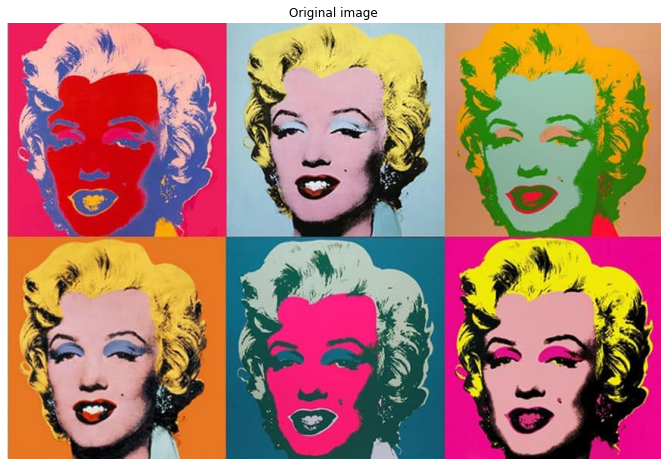

In [9]:
jimshow(image, "Original image")

### Plot colour histograms

`cv2.calcHist([image], channels, mask, histSize, ranges[, hist[, accumulate ]]`

__Blue__

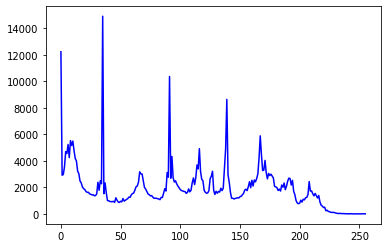

In [22]:
hist = cv2.calcHist([image], [0], None, [256], [0,256]) # image, blue, no mask
plt.plot(hist, color = "blue")

__Green__

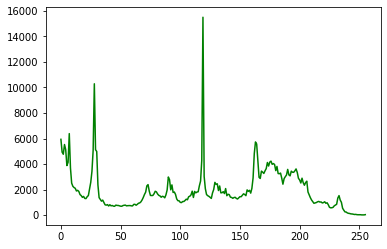

In [20]:
hist = cv2.calcHist([image], [1], None, [256], [0,256] )
plt.plot(hist, color = "green")

__Red__

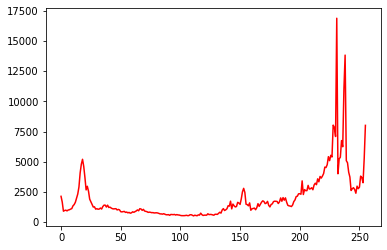

In [21]:
hist = cv2.calcHist([image], [2], None, [256], [0,256])
plt.plot(hist, color = "red")

__Split channels__

In [25]:
(BLUE, GREEN, RED) = cv2.split(image)

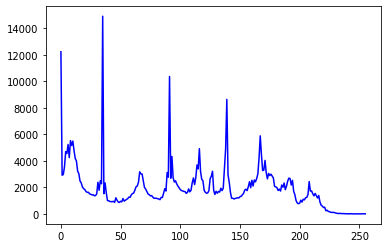

In [29]:
hist = cv2.calcHist([BLUE], [0], None, [256], [0,256]) # only working with 1 channel, so 0
plt.plot(hist, "b")

### Plot multiple channels at the same time

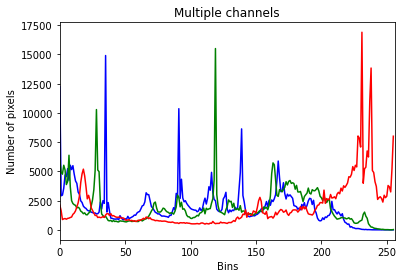

In [46]:
# split channels
channels = cv2.split(image)

# names of colors
color_names = ["b", "g", "r"]

# create figure 
plt.figure()

# add title 
plt.title("Multiple channels")

# add xlable
plt.xlabel("Bins")

# add ylabel 
plt.ylabel("Number of pixels")

# loop over our channels
for channel, color_name in zip(channels, color_names):
    # create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    # plot histogram
    plt.plot(hist, color = color_name)
    # set limits of x-axis 
    plt.xlim(0,256)
    
    
# show the plot 
plt.show()

In [34]:
list(zip(channels, color_names))

[(array([[228, 113,  93, ..., 113, 113, 110],
         [228, 113,  93, ..., 113, 113, 110],
         [228, 113,  93, ..., 113, 113, 111],
         ...,
         [181,  89,  52, ..., 139, 139, 137],
         [181,  89,  52, ..., 139, 139, 137],
         [179,  88,  52, ..., 139, 139, 137]], dtype=uint8),
  'b'),
 (array([[202,  79,  42, ..., 157, 157, 154],
         [202,  79,  42, ..., 157, 157, 154],
         [202,  79,  42, ..., 157, 157, 155],
         ...,
         [228, 143, 116, ...,   7,   7,   8],
         [228, 143, 115, ...,   7,   7,   8],
         [229, 145, 118, ...,   6,   7,   8]], dtype=uint8),
  'g'),
 (array([[255, 179, 200, ..., 220, 220, 217],
         [255, 179, 200, ..., 220, 220, 217],
         [255, 179, 200, ..., 220, 220, 218],
         ...,
         [255, 198, 204, ..., 238, 238, 237],
         [255, 196, 205, ..., 238, 238, 237],
         [255, 197, 207, ..., 240, 238, 237]], dtype=uint8),
  'r')]

__Comparing histograms__

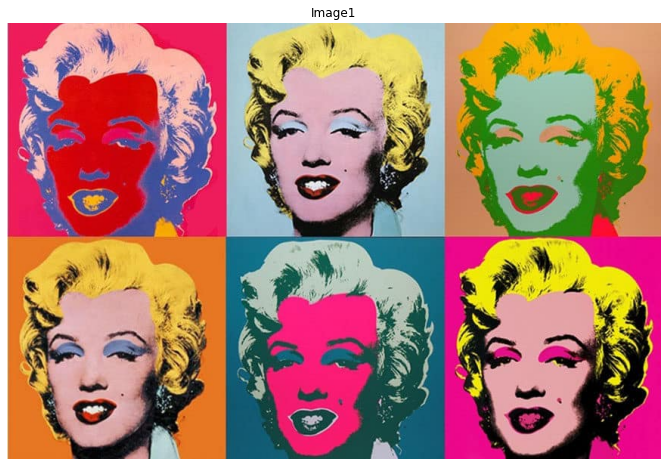

In [49]:
image1 = cv2.imread(os.path.join("..", "data", "img", "marilyn.jpg"))
jimshow(image1, "Image1")

In [44]:
image2 = cv2.imread(os.path.join("..", "data", "img", "starry_night.jpg"))
jimshow(image2, "Image2")

__Extract histograms__

In [57]:
hist1 = cv2.calcHist([image1], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

In [60]:
hist2 = cv2.calcHist([image2], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

__MinMax Normalization__

(value-min) / (max-min)

In [62]:
hist1 = cv2.normalize(hist1, hist1, 0,255, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0,255, cv2.NORM_MINMAX)
# normalise take the image and apply it to itself 

In [64]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)
# 0: closer, higher: further

117165.56